# Black Friday Spending Predictor and Analysis
# By: Aidan Berry

## Problem Statement

For this project, with the Thanksgiving Holiday and Black Friday around the corner, millions of shopper across the globe are setting out in the early morning to snag the best deals at local big box retailers.  I have always been interested in consumer behavior during this annual shopping experience and how different factors such as demographics, location, income, marital status, etc. affect this consumer behavior.  This Black Friday dataset provides consumer spending data  in a retail store with 550,000 obervations consisting of these customer attributes mentioned earlier, both categorical and numerical.  This will serve as sufficient sample size for many machine learning algorithms to effectively train and validate the models while still testing them on a separate partition of the dataset for an accurate analysis of its performance (RMSE).  I am very interested in machine learning and enjoy extracting valuable insights from large dataset to allow for improved business descisions and forecasting future customer behaviors, so I was excited to start working on this project and improve my skills in this area.

## Loading Data and Inspecting

In [3]:
#import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import os
import seaborn as sb
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import random
import math

In [4]:
#set the working directory
os.getcwd()
os.chdir(r"C:\Users\Aidan\Documents\ISE 589 Python\Final Project")

#read in the dataset
dataset = pd.read_csv("BlackFriday.csv")

#see datatypes and number of null entries per column
dataset.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            370591 non-null float64
Product_Category_3            164278 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


The data types of each field are either float, int, or objects.  The only categorical features are the ones with object types which are Product_ID, Gender, Age, City_Category, and Stay_In_Current_City_Years, and we will need to encode these fields as numeric values for analysis.

In [3]:
#look at first 10 rows to make sure data was read in properly
dataset.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,NaN,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871


In [4]:
#check which columns have the null values
dataset.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

The Product_Category_2 and Product_Category_3 columns are the only ones containing null values because a product doesn't necessarily have to fall into 3 different categories

## Data Visualizations

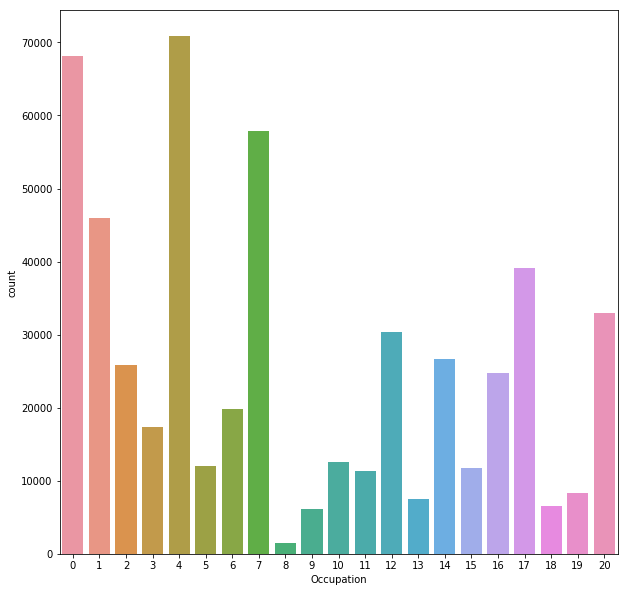

In [5]:
#initialize visualization plot
%matplotlib inline
rcParams['figure.figsize'] = 10, 10

#Distribution of the occupations in the dataset
sb.countplot(x = dataset['Occupation'])

Occupations 0, 4, and 7 seem to have the highest frequency, with occupation 0 leading at around 70,000 occurences.

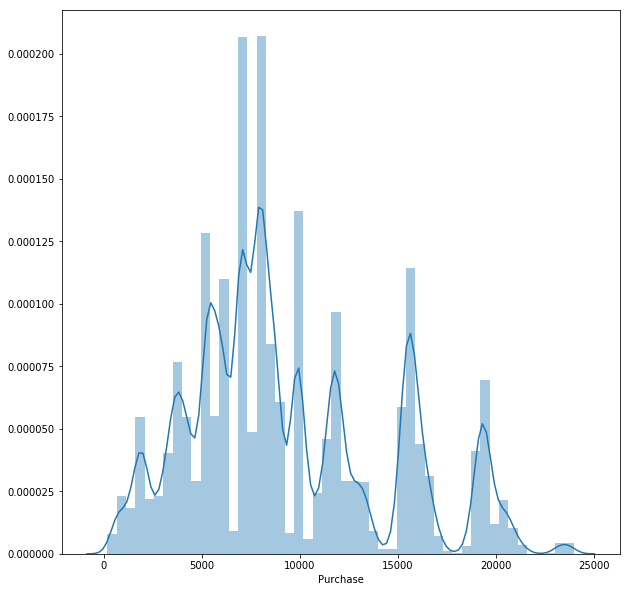

In [6]:
#visualize the distribution of purchase price per item
purchasePrice = dataset['Purchase']
sb.distplot(purchasePrice)

It appears that most of the single item purchases tended in fall in the $5,000 - $10,000 

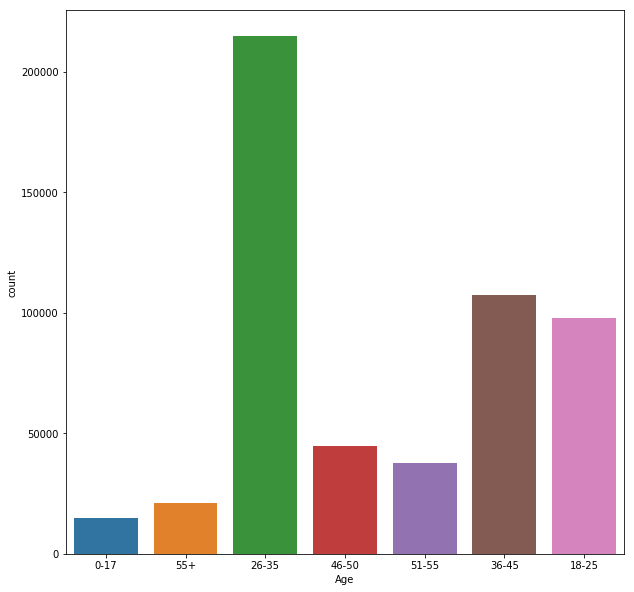

In [7]:
#distribution of Age
sb.countplot(x = dataset['Age'])

The largest age category by far in this dataset is the 26-35 age group

([<matplotlib.patches.Wedge at 0x17ea4cfd908>,
 [Text(-0.787741,0.767766,'M'), Text(0.787741,-0.767766,'F')])

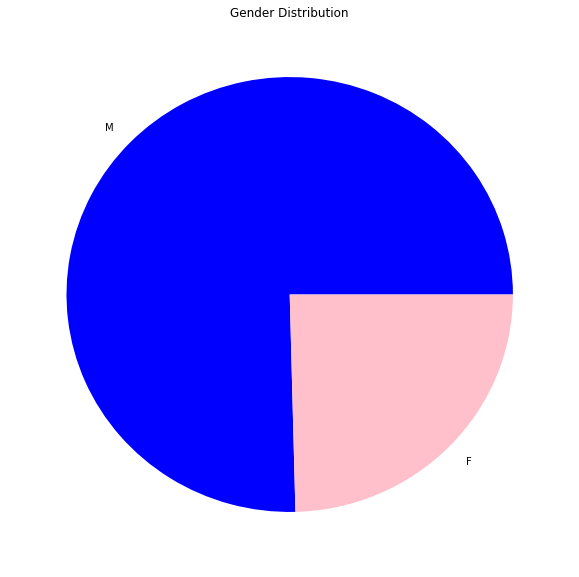

In [8]:
# Pie chart for distribution of gender in dataset
genderCounts = dataset['Gender'].value_counts().values
colors = ['blue', 'pink']
plt.title("Gender Distribution")
labels = dataset['Gender'].value_counts().index
plt.pie(x = genderCounts, colors = colors, labels = labels)

About 75% of the data points consist of males in this dataset

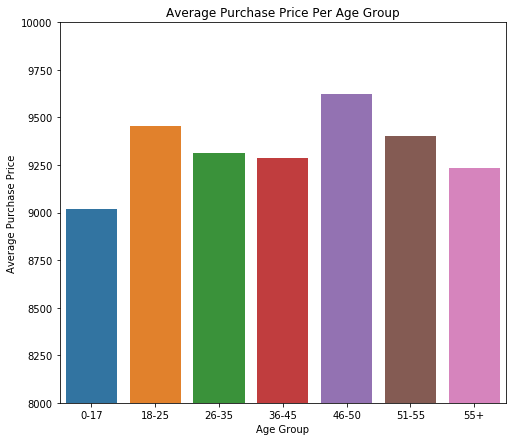

In [9]:
#visualize the avaerage purchase price by age group
avgPurchaseByAge = []
for age in (dataset['Age'].unique()):
    avgPurchaseByAge.append(dataset[dataset['Age']==age].Purchase.mean())
fig, ax =plt.subplots(figsize=(8,7)) 
plt.title('Average Purchase Price Per Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Purchase Price')
plt.ylim(8000, 10000)
sb.barplot(x = ['0-17','18-25','26-35','36-45','46-50','51-55','55+'], y =avgPurchaseByAge)

The age group with the highest average purchase price per item is the 46-50 age group with an average purchase price of about $9,600 per item.  The lowest average purchase price by far occurs within the 0-17 age group which makes the most sense since they dont have jobs or as much money to spend on products. 

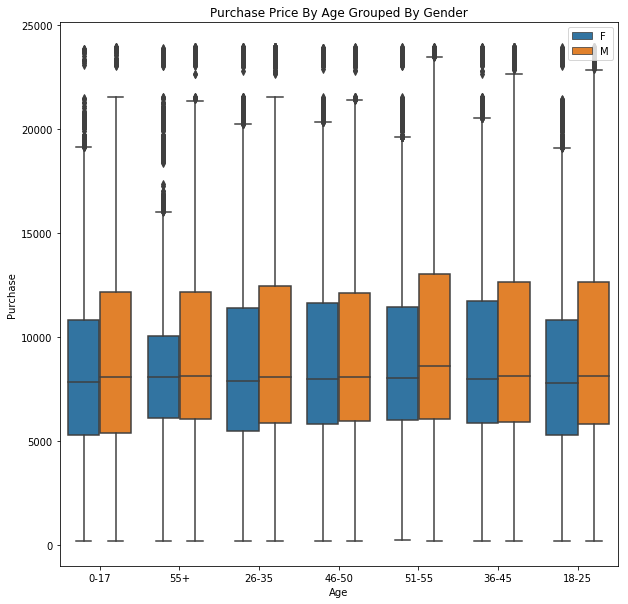

In [10]:
#Builds boxplot showing the distribution of purchase price by gender
plt.title("Purchase Price By Age Grouped By Gender")
ax = sb.boxplot(x = dataset['Age'], y = dataset['Purchase'], hue = dataset['Gender'])
ax.legend(loc =1)
plt.show()

From this chart, we can see that males tend to spend more on black friday per item than females do, with a slightly higher median, higher 3rd quartile and higher upper bound

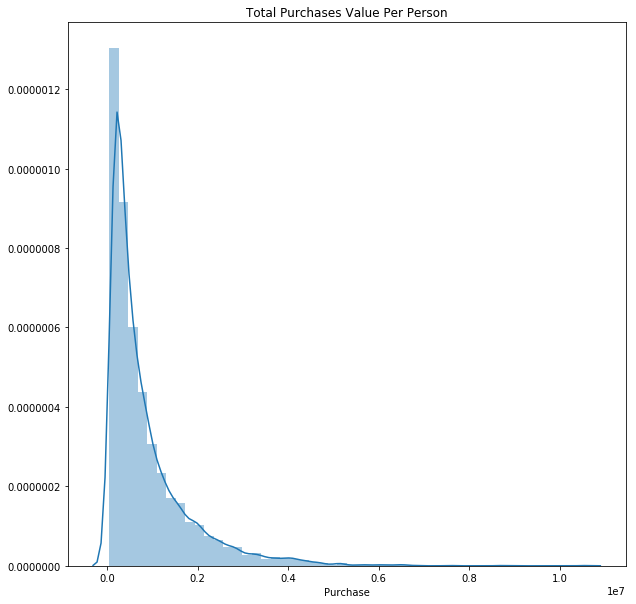

In [11]:
#look at the distribution of total purchase value per person
purchasePerPerson = dataset.groupby('User_ID')['Purchase'].sum()
plt.title("Total Purchases Value Per Person")
plt.xlabel('Total Purchase Value')
sb.distplot(purchasePerPerson)

This chart shows the distribution of the total expenditure per person throughout Black Friday.  It seems that the most frequent range of total expenditures is between 0 and 1,000,000 dollars.

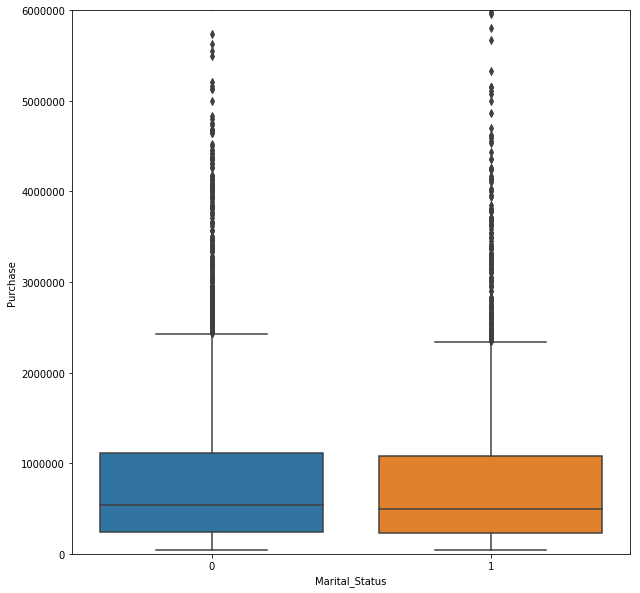

In [12]:
#look at spending by marital status
groupedMaritalStatus = dataset.groupby('User_ID')['Marital_Status'].max()
plt.ylim(0, 6000000)
sb.boxplot(x =  groupedMaritalStatus, y= purchasePerPerson )

It appears that married people spend slightly less in total per person than single people (lower 3rd quartile/median and less high outliers), but there are a few outliers for married people where they spend a much higher amount than the single counterparts, most likely for more wealthy couples.

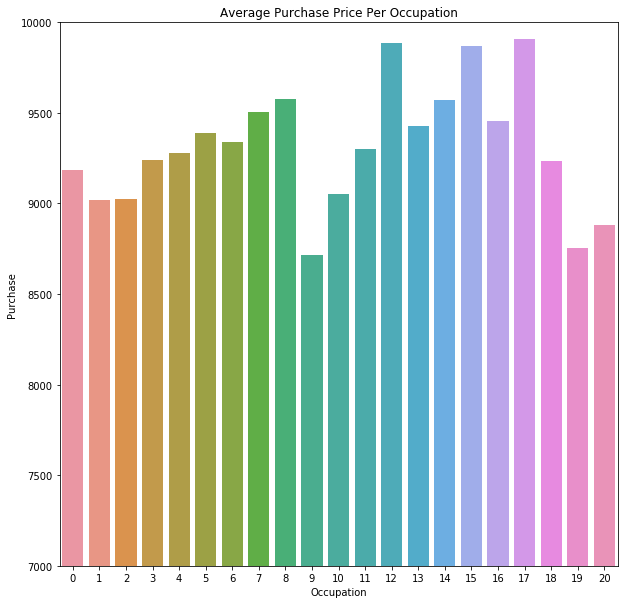

In [13]:
#Bar chart for average purchase by occupation
purchasePerOccupation = dataset.groupby('Occupation')['Purchase'].mean()
plt.title("Average Purchase Price Per Occupation")
plt.ylim(7000,10000)
plt.xlabel("Occupation")
plt.ylabel("Average Purchase")
sb.barplot(x = np.arange(21), y= purchasePerOccupation)


From this chart it appears that 12, 15, and 17 spend the most per purchase on average at around $9,900.

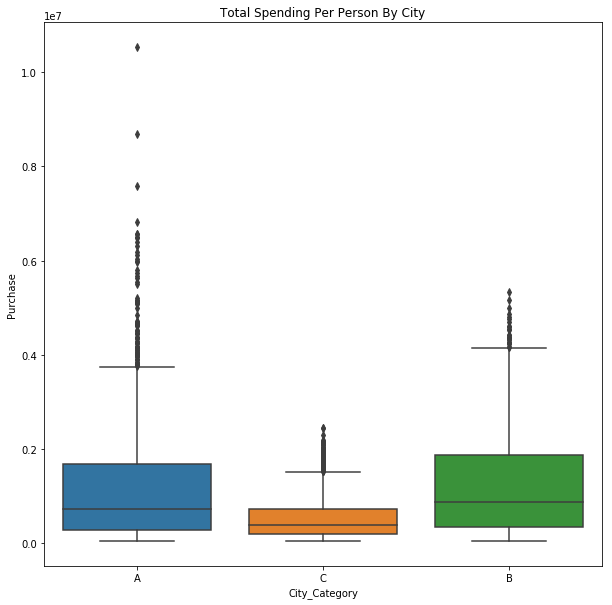

In [14]:
#visualizes the total per person spending by city
cityPerPerson = dataset.groupby('User_ID')['City_Category'].max()
plt.title("Total Spending Per Person By City")
sb.boxplot(x = cityPerPerson, y = purchasePerPerson)


City C has much lower range of total purchase spending per person than city categories A and B.  City category B has the highest average total spending per person as well as the highest 75th percentile.  City A is interesting because it doesn't have as high of an average total expenditure per person as city B , but it has a lot of outliers with extremely high total purchase values compared to the other 2 cities.

## Data Preprocessing

In [5]:
#One hot encode the gender column to make 2 different columns (one male and one female) and have a binary 1 or 0 in each.  
#This is done rather than label encoding because there is no logical ordering to gender
dataset['Gender'] = pd.get_dummies(dataset['Gender'],prefix=['Gender'])


In [6]:
#replace 4+ with 4 in the Stay_In_Current_City_Years column (so that it can be casted as an int)
dataset['Stay_In_Current_City_Years'] = dataset['Stay_In_Current_City_Years'].replace('4+', '4')
#change datatype of this column to int for computation
dataset["Stay_In_Current_City_Years"] = dataset["Stay_In_Current_City_Years"].astype(int)


In [7]:
#use label encoder to impute the categorical field of City_Category to integers so that it can be used in ML model
#label encoder used instead of one hot encoder becuase the City_Category has order and is ranked accordingly
cityEncoder = LabelEncoder()
dataset['City_Category']= cityEncoder.fit_transform(dataset['City_Category'])


In [8]:
# fill the Product_Category_2  and Product_Category_3 null values with 0 because if it isn't in other categories it should be 0
dataset['Product_Category_2']= dataset['Product_Category_2'].fillna(0)
dataset['Product_Category_3']= dataset['Product_Category_3'].fillna(0)

# set the datatypes of these 2 columns to integer so that it can be implemented in ML model
dataset["Product_Category_2"] = dataset["Product_Category_2"].astype(int)
dataset["Product_Category_3"] = dataset["Product_Category_3"].astype(int)

In [9]:
#use the label encoder to impute the age categories to integer values while maintaining chronological ordering and ranking
#label encoder used instead of one hot encoder becuase Age has order to it
ageEncoder = LabelEncoder()
dataset['Age'] = ageEncoder.fit_transform(dataset['Age'])

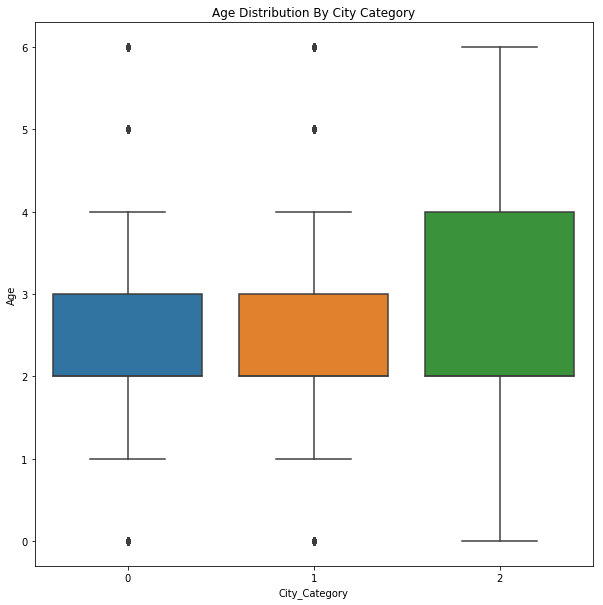

In [20]:
# look at the age distribution in each type of city
plt.title("Age Distribution By City Category")
sb.boxplot(x = "City_Category", y = "Age", data = dataset)

City C has an older leaning population in this dataset compared to cities A and B which have middle aged populations mainly in the range 26-35 

In [10]:
#drops the user ID and product ID columns from dataframe because they are unnecessary for analysis
dataset = dataset.drop(['User_ID', 'Product_ID'], axis = 1)
# check the datatypes of all relevant columns to ensure that they are all numeric so that they can be used in the ML model
dataset.dtypes

Gender                        uint8
Age                           int32
Occupation                    int64
City_Category                 int32
Stay_In_Current_City_Years    int32
Marital_Status                int64
Product_Category_1            int64
Product_Category_2            int32
Product_Category_3            int32
Purchase                      int64
dtype: object

All of the datatypes look good to go to start building the machine learning models, as they are all numerical values.  We drop the User_ID and Product_ID fields since they are unique identifiers for customers and products, so they are irrelevant for analysis.

In [22]:
#view the first 20 entries to ensure quality of data
dataset.head(20)


,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1,0,10,0,2,0,3,0,0,8370
1,1,0,10,0,2,0,1,6,14,15200
2,1,0,10,0,2,0,12,0,0,1422
3,1,0,10,0,2,0,12,14,0,1057
4,0,6,16,2,4,0,8,0,0,7969
5,0,2,15,0,3,0,1,2,0,15227
6,0,4,7,1,2,1,1,8,17,19215
7,0,4,7,1,2,1,1,15,0,15854
8,0,4,7,1,2,1,1,16,0,15686
9,0,2,20,0,1,1,8,0,0,7871


In [23]:
# do another check to see datatypes of columns and number of values
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 10 columns):
Gender                        537577 non-null uint8
Age                           537577 non-null int32
Occupation                    537577 non-null int64
City_Category                 537577 non-null int32
Stay_In_Current_City_Years    537577 non-null int32
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            537577 non-null int32
Product_Category_3            537577 non-null int32
Purchase                      537577 non-null int64
dtypes: int32(5), int64(4), uint8(1)
memory usage: 27.2 MB


All null values are account for and successfully imputed, as there are no null values in any of the remaining fields.

## Correlation Plot

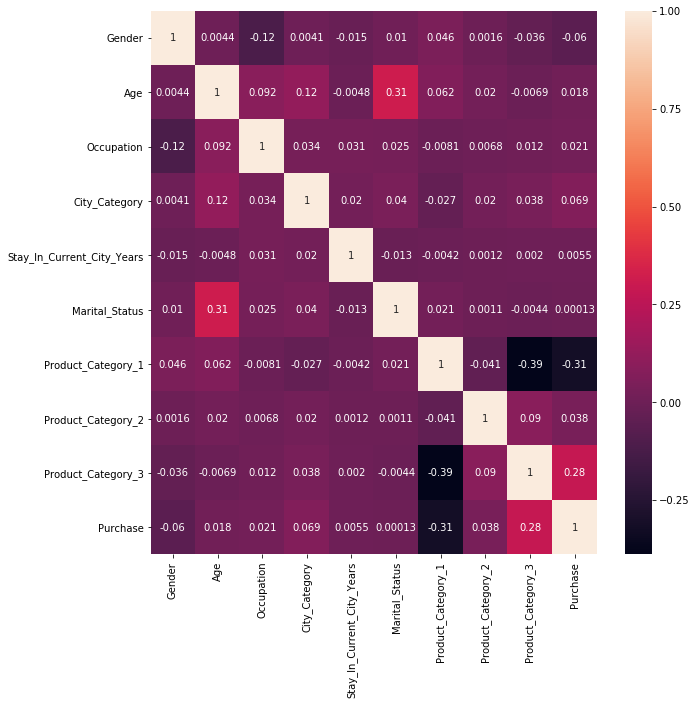

In [24]:
#produces the correlation matrix and visualizes with heatmap
corr = dataset.corr(method = 'pearson')
fig, ax = plt.subplots(figsize=(10,10))
sb.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot = True)


It seems that purchase price has the highest correlation with Product_Category_1 and Product_Category_3 and all variables except Product_Category_1 and gender are positive correlations.  The strong negative correlation between purchase price and Product_Category_1 could indicate that Product_Category_1 contains mainly lower priced items that dont drags the total purchase price down for each order when there is a high quantity of those types of items.  Product_Category_3 has a high positive correlation with purcahse price, so that coudl indicate that this category contains higher priced items/valuables that pull the purchase price up.  Also Product_Category_1 and Product_Category_3 have a strong negative correlation with a coefficient of -0.39, indicating that an increase in one of these item types in the cart causes a decrease in the other (probably since they are on opposite ends of the price spectrum).  Finally, there is a good correlation between Marital_Status and Age with a correlation coefficient of 0.31, which makes sense because people are more likely to get married as they get older.

# Feature Scaling and initializing training/test sets

Here I created the X and Y datasets by subsetting the dataset (X = features, y = Purchase price).  I then split the data into training and test sets using a 75% training, 25% test split ratio.  The sklearn.model_selection contains a very handy package for performing this action.

In [11]:
from sklearn.model_selection import train_test_split
X = dataset.iloc[:, 0:8].values
y = dataset.iloc[:, 9].values.reshape(-1,1)
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size = 0.25, random_state = 42)
X_train

array([[ 0,  2,  7, ...,  0,  2,  8],
       [ 0,  1,  1, ...,  1,  3,  4],
       [ 0,  4, 17, ...,  1,  5,  6],
       ..., 
       [ 1,  1,  1, ...,  0,  5,  0],
       [ 1,  1,  4, ...,  0,  8, 14],
       [ 1,  1,  2, ...,  1,  5, 14]], dtype=int64)

In [12]:
import warnings
warnings.filterwarnings('ignore')

Some of the machine learning algorithms that I will be using in this analysis use euclidean distance within them, so it is vital to scale the features for these cases.  This is because you want all of the variables with different units to be on the same uniform scale so that the distance metrics can be standardized and the algorithm doesn't favor certain variables with larger values because of the specific units used.  This sklearn.preprocessing package contains a function that translates all of the data to N(0,1), which is what we are looking for.

In [13]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
scaled_X_train = sc_X.fit_transform(X_train)
scaled_X_test = sc_X.transform(X_test)
sc_y = StandardScaler()
scaled_y_train = sc_y.fit_transform(y_train)
scaled_y_test = sc_y.fit_transform(y_test)
scaled_X_train

array([[-0.57026836, -0.36704687, -0.16609816, ..., -0.83262201,
        -0.87921415,  0.19601479],
       [-0.57026836, -1.10583151, -1.08619813, ...,  1.20102518,
        -0.61232333, -0.44796461],
       [-0.57026836,  1.11052242,  1.36740178, ...,  1.20102518,
        -0.07854169, -0.12597491],
       ..., 
       [ 1.75356037, -1.10583151, -1.08619813, ..., -0.83262201,
        -0.07854169, -1.09194401],
       [ 1.75356037, -1.10583151, -0.62614815, ..., -0.83262201,
         0.72213077,  1.16198389],
       [ 1.75356037, -1.10583151, -0.93284813, ...,  1.20102518,
        -0.07854169,  1.16198389]])

# Building the models

## Multiple Linear Regression

The first model that we are going to try to build is the multiple linear regression model because of its simpliciy and ease of understanding.  This will give us a good benchmark to base our other model performances off of. 

In [28]:
from sklearn.linear_model import LinearRegression
#build the MLR regressor using training sets
mlr_regressor = LinearRegression()
mlr_regressor.fit(X_train, y_train)

# Predicting the Test set results
mlr_y_pred = mlr_regressor.predict(X_test)

Here we use the metrics package from sklearn to import some good regression performance metrics needed to test the models.  The metrics that I am going to use to test the success for each of the models is root mean squared error (RMSE), mean absolute error (MAE), and the explained variance score (R^2 score).  For each of the models I will also compare the prediction accuracy on the training set to the prediction accuracy on the test set to ensure the model is not overfitted to the training set.  A well fitted model will have a training prediciton error score relatively close to the test prediction error score. The explained variance score will be a good standardized score to test the performance of the model, since the RMSE is an obscurely high value because of the large values that the purchase price dependent variable takes on.

In [30]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score

train_pred_mlr = mlr_regressor.predict(X_train)

train_RMSE_MLR = (mean_squared_error(y_train, train_pred_mlr))**0.5
MLR_RMSE = (mean_squared_error(y_test, mlr_y_pred))**0.5
MLR_MAE = mean_absolute_error(y_test, mlr_y_pred)
MLR_EVS = explained_variance_score(y_test, mlr_y_pred)
train_EVS_mlr = r2_score(y_train, train_pred_mlr)

print(f" Training R^2 Score: {round(train_EVS_mlr,3)} \n Test R^2 Score: {round(MLR_EVS,3)} \n Training RMSE: {round(train_RMSE_MLR,3)} \n Test RMSE: {round(MLR_RMSE,3)} \n Test MAE: {round(MLR_MAE,3)}")

 Training R^2 Score: 0.107 
 Test R^2 Score: 0.103 
 Training RMSE: 4704.962 
 Test RMSE: 4723.973 
 Test MAE: 3628.882


The training r2 score is very close to the test r2 score, so the model is not overfit.  However, the RMSE is very high for this model and the explained variance score is only 10.3%, which indicates this model is not a predictor for our data. This will serve as a good benchmark for the other models we build to see how they compare to this.

## KNN Regression

The next model that I chose to build is a KNN regression model.  KNN is a simple algorithm that is easy to understand, but the k value for the number of neighbors must be set to a value that optimizes the results of the algorithm. The KNN algorithm also uses euclidean distance metrics in its calculations, so it is important to use scaled feature values as an input to the model so that the units of the variable don't cause certain variables to get more weight than others. To find the ideal value for k neighbors, I plotted the RMSE for the respective K values from 1 to 20 to see which k-value in the model produces the lowest eror value.

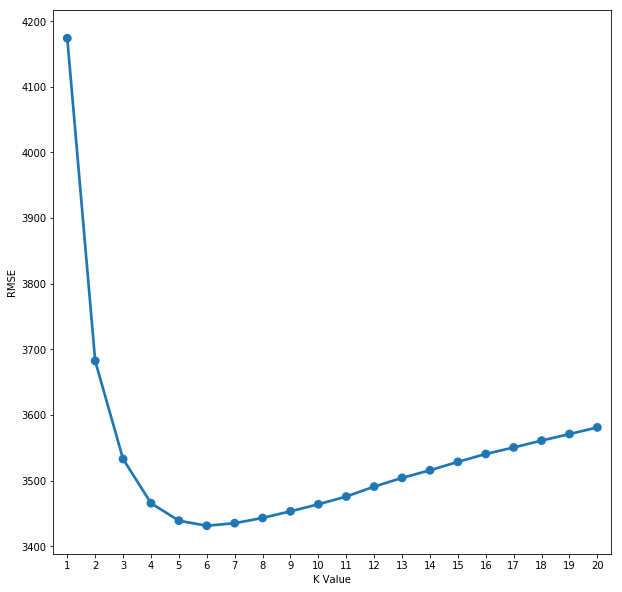

In [32]:
random.seed(42)
from sklearn.neighbors import KNeighborsRegressor
a = []
#loop through the 20 k values
for i in np.arange(1,21):
    #build model using i as the temporary k value
    knn_regressor = KNeighborsRegressor(n_neighbors = i)
    knn_regressor.fit(scaled_X_train, y_train)
    y_pred = knn_regressor.predict(scaled_X_test)
    temp_RMSE = a.append((mean_squared_error(y_test, y_pred))**0.5)
x= np.arange(1,21)
#plots the k value against the RMSE value for each value of k
ax = sb.pointplot(x,a)
ax.set(xlabel='K Value', ylabel='RMSE')
plt.show()


From this plot it looks like the k-value that minimizes the RMSE is 6. Therefore we will fit the final model using this k-value to get optimal results.

In [33]:
random.seed(42)
knn_regressor = KNeighborsRegressor(n_neighbors = 6)
knn_regressor.fit(scaled_X_train, y_train)

knn_y_pred = knn_regressor.predict(scaled_X_test)

In [34]:
train_pred_knn = knn_regressor.predict(scaled_X_train)

train_RMSE_KNN = (mean_squared_error(y_train, train_pred_knn))**0.5
KNN_RMSE = (mean_squared_error(y_test, knn_y_pred))**0.5
KNN_MAE = mean_absolute_error(y_test, knn_y_pred)
KNN_EVS = explained_variance_score(y_test, knn_y_pred)
train_EVS_KNN = r2_score(y_train, train_pred_knn)

print(f" Training R^2 Score: {round(train_EVS_KNN,3)} \n Test R^2 Score: {round(KNN_EVS,3)} \n Training RMSE: {round(train_RMSE_KNN,3)} \n Test RMSE: {round(KNN_RMSE,3)} \n Test MAE: {round(KNN_MAE,3)}")

 Training R^2 Score: 0.625 
 Test R^2 Score: 0.527 
 Training RMSE: 3047.52 
 Test RMSE: 3431.125 
 Test MAE: 2497.24


The results of this KNN model are much better than the previous MLR model.  The explained variance R^2 score is much higher at 0.527 for this model and the RMSE is lower (about half).  The problem with this model is that the training RMSE is very far off from the test RMSE for the predictions, which indicates that the model is overfitted to the training set and not as effective on new data points.

## Polynomial Regression

The next model that I will try to build here is the polynomial regression.  The polynomical regression model requires fine tuning of one main hyperparameter, which is the degree of the polynomial.  To figure out which polynomial degree minimizes the error, I plotted the RMSE of each polynomial degree from 1 to 4.  From this plot, it appears that the 4th degree polynomial gets the lowest amount of error, so I will use that in building the final model.

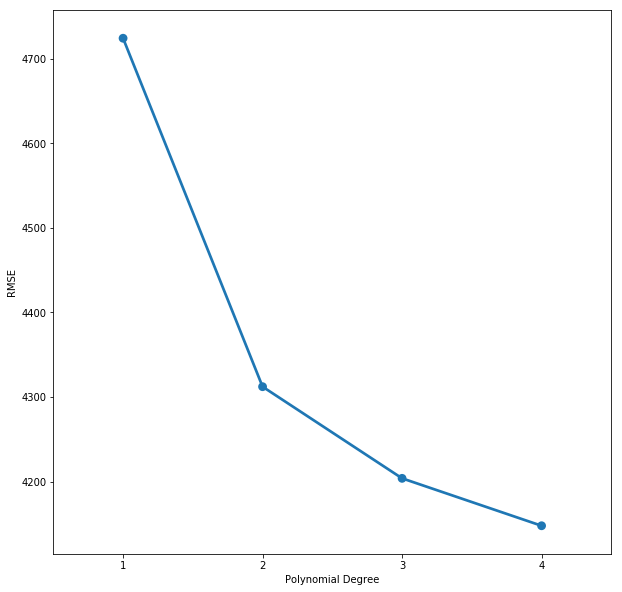

In [35]:
from sklearn.preprocessing import PolynomialFeatures

b = []
for i in np.arange(1,5):
    poly_regressor = PolynomialFeatures(degree = i)
    X_poly = poly_regressor.fit_transform(X_train)
    poly_regressor.fit(X_poly, y_train)
    lin_reg_2 = LinearRegression()
    lin_reg_2.fit(X_poly, y_train)
    y_pred = lin_reg_2.predict(poly_regressor.fit_transform(X_test))
    temp_RMSE = b.append((mean_squared_error(y_test, y_pred))**0.5)
    
x= np.arange(1,5)
ax = sb.pointplot(x,b)
ax.set(xlabel='Polynomial Degree', ylabel='RMSE')
plt.show()


In [36]:
# build final polynomial regressor using degree 4 polynomial to minimize error
poly_regressor = PolynomialFeatures(degree = 4)
X_poly = poly_regressor.fit_transform(X_train)
poly_regressor.fit(X_poly, y_train)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y_train)
poly_y_pred = lin_reg_2.predict(poly_regressor.fit_transform(X_test))

4th degree polynomial has the lowest RMSE, so we will use that for the final model

In [37]:
train_pred_poly = lin_reg_2.predict(poly_regressor.fit_transform(X_train))

train_RMSE_poly = (mean_squared_error(y_train, train_pred_poly))**0.5
poly_RMSE = (mean_squared_error(y_test, poly_y_pred))**0.5
poly_MAE = mean_absolute_error(y_test, poly_y_pred)
poly_EVS = explained_variance_score(y_test, poly_y_pred)
train_EVS_poly = r2_score(y_train, train_pred_poly)

print(f" Training R^2 Score: {round(train_EVS_poly,3)} \n Test R^2 Score: {round(poly_EVS,3)} \n Training RMSE: {round(train_RMSE_poly,3)} \n Test RMSE: {round(poly_RMSE,3)} \n Test MAE: {round(poly_MAE,3)}")

 Training R^2 Score: 0.312 
 Test R^2 Score: 0.309 
 Training RMSE: 4129.175 
 Test RMSE: 4147.744 
 Test MAE: 3105.113


After analysis of the performance metrics of the polynomial model, it shows that this is not the best prediction model for this dataset because of the high RMSE value and low explained variance score of only 0.309. The model is also not overfitted because of the close proximity between the test and training RMSE values, which shows that it is just the model itself which is the problem.

## Random Forest

The final model that I am going to try out is the Random Forest Regression model.  A random forest is an ensemble method that is basically a set of decision trees. The random forest runs all of the decision trees and gets predicitons from all of them, and then takes the average prediction value, making it a very accurate and robust model, but also very prone to overfitting if too many decision trees are used.  The hyperparameter than will need to be tuned for this model is the number of trees in the random forest, and we will find the optimal number by once again plotting the number of trees against the respective RMSE.

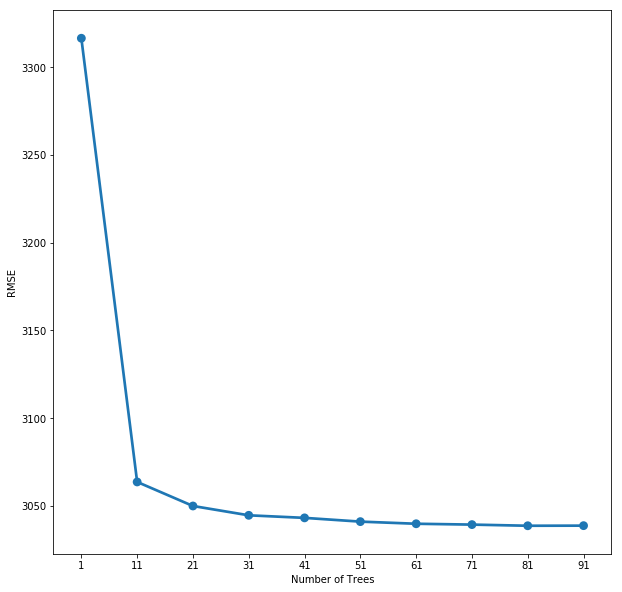

In [39]:
from sklearn.ensemble import RandomForestRegressor

a = []
for i in np.arange(1,100, 10):
    rf_regressor = RandomForestRegressor(n_estimators = i, random_state = 0)
    rf_regressor.fit(X_train, y_train)
    y_pred = rf_regressor.predict(X_test)
    temp_RMSE = a.append((mean_squared_error(y_test, y_pred))**0.5)

x= np.arange(1,100,10)
ax = sb.pointplot(x,a)
ax.set(xlabel='Number of Trees', ylabel='RMSE')
plt.show()

20 trees: 3050.717

50 trees: 3041.039

100 trees 3038.432

300 trees: 3036.358
    
I will choose 60 trees to strike the right balance between overfitting and accuracy of predictions. There appears to be diminishing returns after that 60 of trees, and by increasing past that, the model is prone to overfitting.

In [40]:
rf_regressor = RandomForestRegressor(n_estimators = 60, random_state = 0)
rf_regressor.fit(X_train, y_train)

# Predicting a new result
rf_y_pred = rf_regressor.predict(X_test)

In [41]:
train_pred_rf = rf_regressor.predict(X_train)

train_RMSE_rf = (mean_squared_error(y_train, train_pred_rf))**0.5
rf_RMSE = (mean_squared_error(y_test, rf_y_pred))**0.5
rf_MAE = mean_absolute_error(y_test, rf_y_pred)
rf_EVS = explained_variance_score(y_test, rf_y_pred)
train_EVS_rf = r2_score(y_train, train_pred_rf)

print(f" Training R^2 Score: {round(train_EVS_rf,3)} \n Test R^2 Score: {round(rf_EVS,3)} \n Training RMSE: {round(train_RMSE_rf,3)} \n Test RMSE: {round(rf_RMSE,3)} \n Test MAE: {round(rf_MAE,3)}")

 Training R^2 Score: 0.739 
 Test R^2 Score: 0.629 
 Training RMSE: 2545.239 
 Test RMSE: 3039.965 
 Test MAE: 2232.021


These performance metrics indicate that the Random Forest Regression model with 60 trees is pretty effective model compared to the other models tested.  The explained variance score of 0.629 on the test set is the highest thus far and the RMSE is the lowest error value. The test and train RMSE values are decently close indicating that the model could be slightly overfitted, but not too severely, which allows the error to stay lower.  

## XGBoost

In [14]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score


xgb_reg = XGBRegressor(n_estimators=100, max_depth=12, silent=False)
xgb_reg.fit(X_train,y_train)
xgb_y_pred = xgb_reg.predict(X_test)

train_pred_xgb = xgb_reg.predict(X_train)

train_RMSE_xgb = (mean_squared_error(y_train, train_pred_xgb))**0.5
xgb_RMSE = (mean_squared_error(y_test, xgb_y_pred))**0.5
xgb_MAE = mean_absolute_error(y_test, xgb_y_pred)
xgb_EVS = explained_variance_score(y_test, xgb_y_pred)
train_EVS_xgb = r2_score(y_train, train_pred_xgb)

print(f" Training R^2 Score: {round(train_EVS_xgb,3)} \n Test R^2 Score: {round(xgb_EVS,3)} \n Training RMSE: {round(train_RMSE_xgb,3)} \n Test RMSE: {round(xgb_RMSE,3)} \n Test MAE: {round(xgb_MAE,3)}")

[00:59:22] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
 Training R^2 Score: 0.705 
 Test R^2 Score: 0.656 
 Training RMSE: 2704.002 
 Test RMSE: 2924.626 
 Test MAE: 2173.289


In [15]:
xgb_reg.feature_importances_

array([ 0.01022843,  0.01143662,  0.01231644,  0.01434345,  0.01182647,
        0.01178102,  0.9138158 ,  0.01425187], dtype=float32)

Product Category 1 is the most predictive feature in determining purchase value.

In [24]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV

params = {'gamma':[0,10,20,30], 'n_estimators':[10, 50, 75, 100, 150], 'max_depth':[3,6,9,12], 'eta':[0,.3,.6,.9]}
search = RandomizedSearchCV(xgb_reg, params, cv=5, scoring ='neg_mean_absolute_error')
search.fit(X_train, y_train)
print(search.best_params_)


[15:58:45] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:59:03] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:59:21] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:59:39] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:59:57] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:00:15] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:00:17] WARNI

[16:30:53] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
{'n_estimators': 100, 'max_depth': 12, 'gamma': 0, 'eta': 0}


In [23]:
import sklearn
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'brier_score_loss',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'mutual_info_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'v_measure_score']

## Analysis of Findings

|                               | RMSE         | Explained Variance Score |   |   |
|-------------------------------|--------------|------------------|---|---|
| Multiple Linear Regression    | 4723.973 |  0.103           |   |   |
| K-Nearest Neighbor Regression | 3431.125 |  0.527           |   |   |
| Polynomial Regression         | 4147.744 |  0.309           |   |   |
| Random Forest Regression      | 3039.965  |  0.629           |   |   |

This table summarizes the results of all of the models tested out in this analysis, with the RMSE value and the explained variance value for each model to assess the performance.  The final KNN model used a k-value of 6, the final polynomial model used a degree of 4, and the final random forest model used 60 trees to get these results.  Based on these results, the random forest regression model was the best performing model for predicting the purchase price of new orders based on the given features. The reason this model was the best is because 63% of the variance was explained, which was significantly higher than the other models and the RMSE of this model was 3039.965 which was significantly less than the other models as well and not too bad considering the average purchase price was around 9500.  Ensemble methods such as the random forest are very effective for prediction since it takes the average of many different decision trees. I am fairly confident in this models ability to predict new customer purchase values in future Black Fridays at this given retail store based on these results.  This information would be very valuable to this retail store for inventory planning purposes (ensuring there is enough supply to meet the demand), setting the product prices/discounts, and forecasting profit into the future.  This model is able to provide actionable insight to allow this retail store to operate more efficiently and become more profitable.